# Practico 3
Numeros aleatorios y monte carlo

In [ ]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
%matplotlib inline

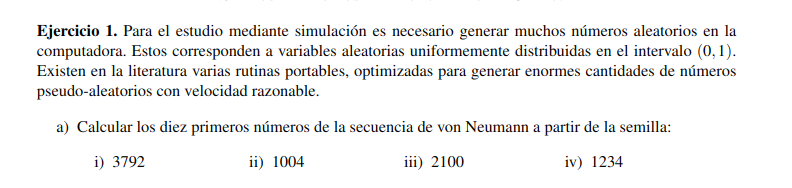

In [2]:
##generador de von Neumann
def vonNeumann(u):
    'u debe ser un entero de hasta 4 cifras'
    u=((u**2)//100) %10000
    return u


In [3]:
##Generación de una secuencia con el generador de von Neumann
##n=longitud deseada de la secuencia
##semilla: número entero de hasta cuatro dígitos
n = 10
#1234#2345 #1122 # 3792  #2100  #9999
semillas = [3792,1004,2100,1234]
secuencia=[semillas[0]]
for i in  semillas:
    secuencia=[i]
    for i in range(n):
        secuencia.append(vonNeumann(secuencia[i]))
    print(secuencia)


#secuencia_en_0_1 = [secuencia[i]/10000 for i in range(n)]
#print(secuencia_en_0_1)


[3792, 3792, 3792, 3792, 3792, 3792, 3792, 3792, 3792, 3792, 3792]
[1004, 80, 64, 40, 16, 2, 0, 0, 0, 0, 0]
[2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100]
[1234, 5227, 3215, 3362, 3030, 1809, 2724, 4201, 6484, 422, 1780]


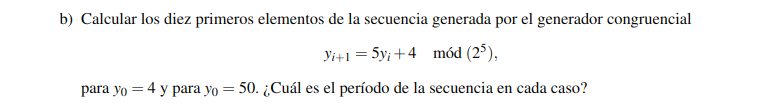

In [4]:
###Generador mixto
##M: período, a: multiplicador, c:incremento
def ranMixto(a, c, M, u):
    return (a * u + c) % M

In [5]:
n = 10
periodo = 2^5
multiplicador = 5
incremento = 4

semillas = [4,50]
for i in semillas:
    secuencia=[i]
    for i in range(n):
        secuencia.append(ranMixto(multiplicador,incremento,periodo,secuencia[i]))
    print(secuencia)

[4, 3, 5, 1, 2, 0, 4, 3, 5, 1, 2]
[50, 2, 0, 4, 3, 5, 1, 2, 0, 4, 3]


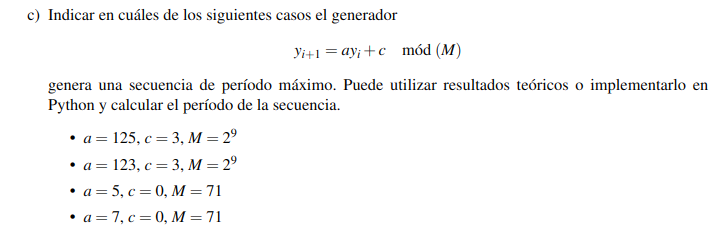

- La eleccion de M se relaciona con la longitud de la secuencia y la velocidad de calculo
- a y c, en funcion de M, determinaran el periodo.

Se dice periodo maximo cuando es = M. si y solo si
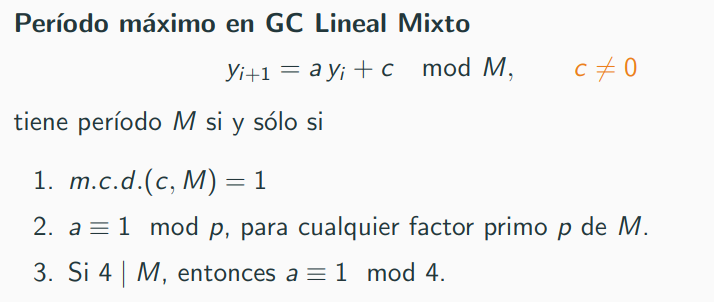


- a=125, c=3 y M=2^9
    mcd(3, 2^9) = 1
    M tiene factores primos = 2
    125 % 2 = 1. Hay periodo maximo

- a = 123, c = 3, M = 2^9
  - mcd(3, 2^9) = 1
  - M tiene factores primos = 2
  - 123 % 2 = 1. Hay periodo maximo
  
- a = 5, c = 3, M = 71
  - mcd(3, 71) = 1
  - M tiene factores primos = 71
  - 5 % 71 = 5. No hay periodo maximo

- a = 7, c = 0, M = 71
  - mcd(0, 71) = 71
  - M tiene factores primos = 71
  - 7 % 71 = 7. No hay periodo maximo

In [3]:
x = 7 % 71
print(x)

7
